## Darian Gurrola
## Course Instructor: Dr. Keiona Middleton

## A1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The business question being investigated is "How can the telecommunications company segment its customers into distinct clusters?"  This will be answered using a k-means clustering algorithm.

## A2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The primary goal of this analysis is to determine the optimal number of clusters using K-means.  

## B1.

For this analysis, I will use a K-means to group the telecommunications customers into clusters.  K-means works by selecting k data points to serve as centroids (center points) of a cluster.  The remaining data points are assigned to the nearest centroid to form clusters.  This process is repeated by iterating over a range of values for k (Sharma 2024).  The expected outcome is to determine what the optimal number of clusters is.

## B2. 

One assumption of K-means clustering is that all clusters have the same variance.  This means that the data points should be distributed similarly around each centroid (Geeks for Geeks, 2023).

## B3.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I used several python libraries to support this analysis.  Pandas was used to import and manipulate the initial data.  Numpy was used to perform basic calculations.  Seaborn and matplotlib were used to generate visualizations.  Lastly, scikit-learn was used to create and evaluate the K-means models.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## C1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One data preprocessing goal for this analysis is to clean the data.  This process will involve detecting and treating any duplicates, missing values, and outliers.  Data cleaning is required to produce consistent, structured, and accurate data for use in an analysis.  Failure to treat data quality issues could cause the clustering model to produce misleading results.

## C2. 

For this analysis, I will be using the variables below.  Each variable selected is continuous.

<ul>
    <li>Population</li>
    <li>Children</li>
    <li>Age</li>
    <li>Income</li>
    <li>Outage_sec_perweek</li>
    <li>Email</li>
    <li>Contacts</li>
    <li>Yearly_equip_failure</li>
    <li>Tenure</li>
    <li>MonthlyCharge</li>
    <li>Bandwidth_GB_Year</li>
</ul>

## C3.

The first step in preparing the data is to import the initial csv file.  To do this, I will use the "read_csv()" method from the pandas library.  The initial data will be imported to a dataframe called "df_initial".

In [2]:
df_initial = pd.read_csv('churn_clean.csv')

I will then select my continuous variables and assign them to a new dataframe called "df_churn".

In [3]:
df_churn = df_initial[["Population","Children","Age","Income","Outage_sec_perweek","Email","Contacts","Yearly_equip_failure","Tenure","MonthlyCharge","Bandwidth_GB_Year"]]

The next step is to explore the dataset.  I will do this by printing the first five observations using the "head()" function from pandas.  This will provide a general idea of what the data looks like.  After that, I will use the "describe()" method to obtain summary statistics such as the mean and median values for each of the selected variables.

In [4]:
#Print first five rows of df_churn
df_churn.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436


In [5]:
#Print summary of Population variable
print(df_churn["Population"].describe())

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64


In [6]:
#Print summary of Children variable
print(df_churn["Children"].describe())

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64


In [7]:
#Print summary of Age variable
print(df_churn["Age"].describe())

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


In [8]:
#Print summary of Income variable
print(df_churn["Income"].describe())

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64


In [9]:
#Print summary of Outage_sec_perweek variable
print(df_churn["Population"].describe())

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64


In [10]:
#Print summary of Email variable
print(df_churn["Email"].describe())

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64


In [11]:
#Print summary of Contacts variable
print(df_churn["Contacts"].describe())

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64


In [12]:
#Print summary of Yearly_equip_failure variable
print(df_churn["Yearly_equip_failure"].describe())

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64


In [13]:
#Print summary of Tenure variable
print(df_churn["Tenure"].describe())

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64


In [14]:
#Print summary of MonthlyCharge variable
print(df_churn["MonthlyCharge"].describe())

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


In [15]:
#Print summary of Bandwidth_GB_Year variable
print(df_churn["Bandwidth_GB_Year"].describe())

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next step in my preparation process was to clean the data.  This will involve detecting and treating data quality issues such as duplicates, missing values, and outliers.  I detected duplicates by combining the "duplicated()" and "value_counts()” methods from the pandas library and using them on "df_churn".  The output indicated that there were no duplicate rows in the data.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I then moved on to detecting missing values in the data. To do this, I used the "isnull()" method from pandas and the "sum()" method on "df_churn".  The output showed that there were no missing values in the dataset.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I detected outliers in the data by generating boxplots for each of the quantitative variables.  This was done using the "boxplot()" function from the seaborn library.   In addition to the visualizations, I created a function called "boxplot_info()".  This function accepts a feature from df_churn as an input and provides key information such as the number of outliers and the range of outlier values.  The resulting output showed that there were outliers in "Population", "Children", "Income", "Outage_sec_perweek", and "Yearly_equip_failure". 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After reviewing the boxplots for each numerical variable, I chose to retain all outliers.  This was because the values were plausible and in my opinion, not egregrious enough to exclude.  I also did not want to reduce the sample size or potentially introduce bias into the dataset. 

In [16]:
#Detect duplicate rows in df_churn 
print(df_churn.duplicated().value_counts())

False    10000
dtype: int64


In [17]:
#Detect missing values in df_churn
df_churn.isnull().sum()

Population              0
Children                0
Age                     0
Income                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

In [18]:
#Create function to provide boxplot information
def boxplot_info(input):

    #obtain values of column and ignore nulls 
    data = input.dropna().values
    
    #calculate values of Q1 and Q3   
    q1 = input.quantile(0.25)
    print("Q1: " + str(q1))
    q3 = input.quantile(0.75)
    print("Q3: " + str(q3))
    
    #Calculate interquartile range for boxplot by subtracting Q1 from Q3
    iqr = q3 - q1
    print("IQR: " + str(iqr))
    
    #Calculate whisker values of boxplot. 
    whisker_lower = q1 - (1.5 * iqr)
    print("Lower Whisker: " + str(whisker_lower))
    whisker_upper = q3 + (1.5 * iqr)
    print("Upper Whisker: " + str(whisker_upper))
    
     #Find number of outliers outside of Q1 and Q3.  Print total number of outliers in column.  
    outliers_min = (input < whisker_lower).sum()
    print("Number of outliers lower than boxplot minimum: " + str(outliers_min))
    outliers_max = (input > whisker_upper).sum()
    print("Number of outliers greater than boxplot maximum: " + str(outliers_max))
    outliers_total = outliers_min + outliers_max
    print("Total number of Outliers: " + str(outliers_total))
    max_outlier = max(data)
    print("Maximum Value: " + str(max_outlier))
    min_outlier = min(data)
    print("Minimum Value: " + str(min_outlier))

Q1: 738.0
Q3: 13168.0
IQR: 12430.0
Lower Whisker: -17907.0
Upper Whisker: 31813.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 937
Total number of Outliers: 937
Maximum Value: 111850
Minimum Value: 0


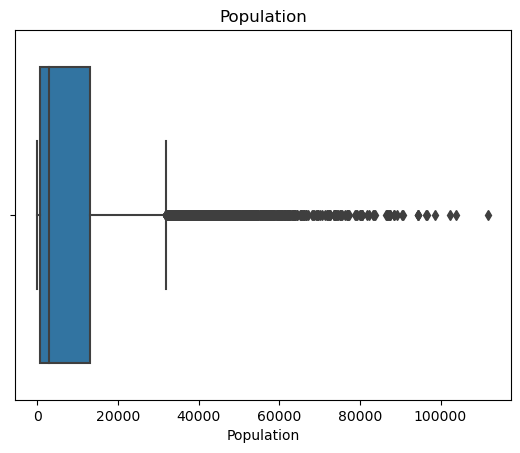

In [19]:
#Detect outliers in Population variable
population_boxplot = sns.boxplot(x="Population", data = df_churn).set_title("Population")

#Generate boxplot info for Population using boxplot_info function
boxplot_info(df_churn['Population'])

Q1: 0.0
Q3: 3.0
IQR: 3.0
Lower Whisker: -4.5
Upper Whisker: 7.5
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 401
Total number of Outliers: 401
Maximum Value: 10
Minimum Value: 0


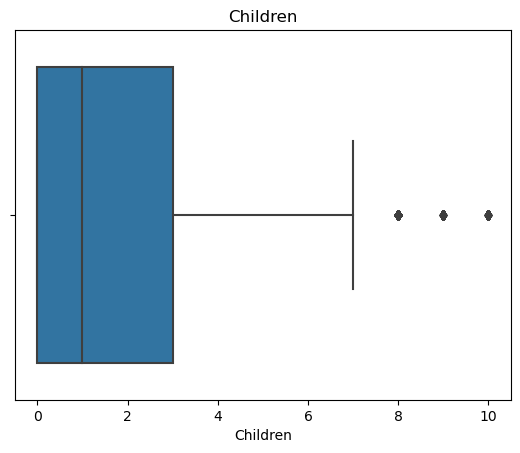

In [20]:
#Detect outliers in Children variable
population_boxplot = sns.boxplot(x="Children", data = df_churn).set_title("Children")

#Generate boxplot info for Children using boxplot_info function
boxplot_info(df_churn['Children'])

Q1: 35.0
Q3: 71.0
IQR: 36.0
Lower Whisker: -19.0
Upper Whisker: 125.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Maximum Value: 89
Minimum Value: 18


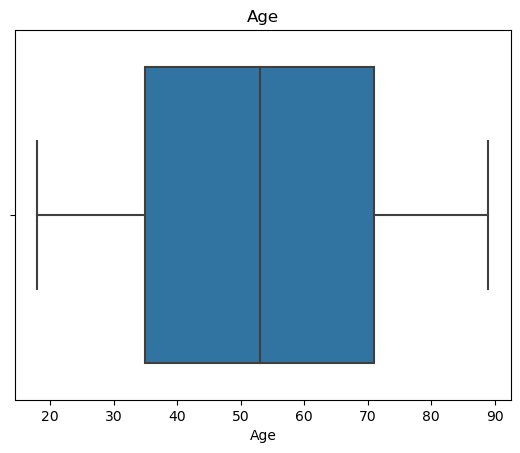

In [21]:
#Detect outliers in Age variable
population_boxplot = sns.boxplot(x="Age", data = df_churn).set_title("Age")

#Generate boxplot info for Population using boxplot_info function
boxplot_info(df_churn['Age'])

Q1: 19224.7175
Q3: 53246.17
IQR: 34021.4525
Lower Whisker: -31807.46125
Upper Whisker: 104278.34875
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 336
Total number of Outliers: 336
Maximum Value: 258900.7
Minimum Value: 348.67


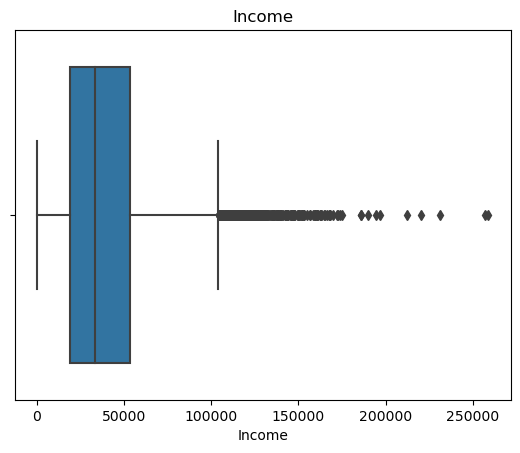

In [22]:
#Generate boxplot for Income variable
income_boxplot = sns.boxplot(x="Income", data = df_churn).set_title("Income")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Income'])

Q1: 10.0
Q3: 14.0
IQR: 4.0
Lower Whisker: 4.0
Upper Whisker: 20.0
Number of outliers lower than boxplot minimum: 23
Number of outliers greater than boxplot maximum: 15
Total number of Outliers: 38
Maximum Value: 23
Minimum Value: 1


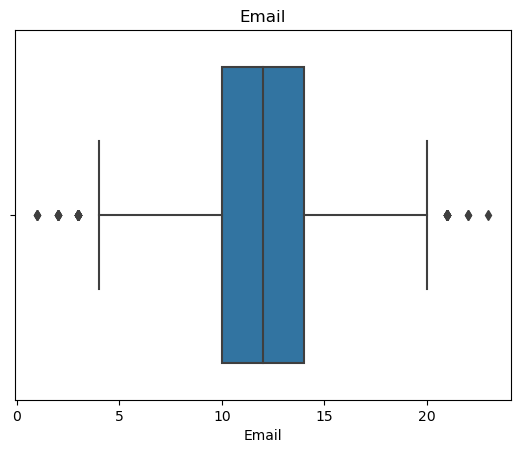

In [23]:
#Generate boxplot for Email variable
email_boxplot = sns.boxplot(x="Email", data = df_churn).set_title("Email")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Email'])

Q1: 8.018214
Q3: 11.969485
IQR: 3.951271
Lower Whisker: 2.0913075
Upper Whisker: 17.8963915
Number of outliers lower than boxplot minimum: 33
Number of outliers greater than boxplot maximum: 43
Total number of Outliers: 76
Maximum Value: 21.20723
Minimum Value: 0.09974694


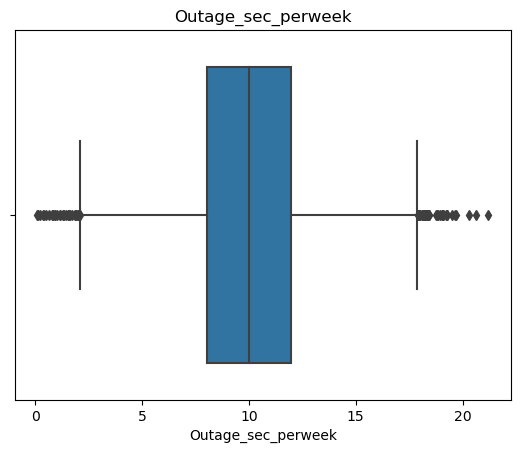

In [24]:
#Generate boxplot for Outage_sec_perweek variable
outage_boxplot = sns.boxplot(x="Outage_sec_perweek", data = df_churn).set_title("Outage_sec_perweek")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Outage_sec_perweek'])

Q1: 0.0
Q3: 1.0
IQR: 1.0
Lower Whisker: -1.5
Upper Whisker: 2.5
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 94
Total number of Outliers: 94
Maximum Value: 6
Minimum Value: 0


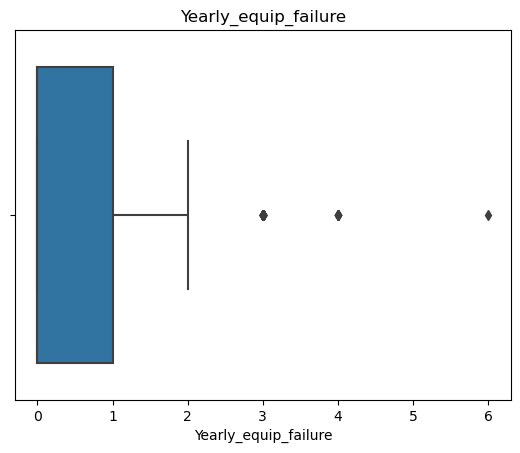

In [25]:
#Generate boxplot for Yearly_equip_failure variable
email_boxplot = sns.boxplot(x="Yearly_equip_failure", data = df_churn).set_title("Yearly_equip_failure")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Yearly_equip_failure'])

Q1: 7.91769359175
Q3: 61.479795
IQR: 53.56210140825
Lower Whisker: -72.42545852062501
Upper Whisker: 141.822947112375
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Maximum Value: 71.99928
Minimum Value: 1.00025934


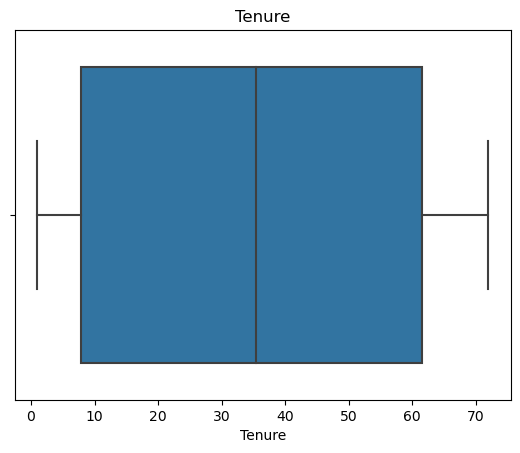

In [26]:
#Generate boxplot for Tenure variable
email_boxplot = sns.boxplot(x="Tenure", data = df_churn).set_title("Tenure")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Tenure'])

Q1: 139.979239
Q3: 200.734725
IQR: 60.75548599999999
Lower Whisker: 48.84601000000002
Upper Whisker: 291.867954
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Maximum Value: 290.160419
Minimum Value: 79.97886


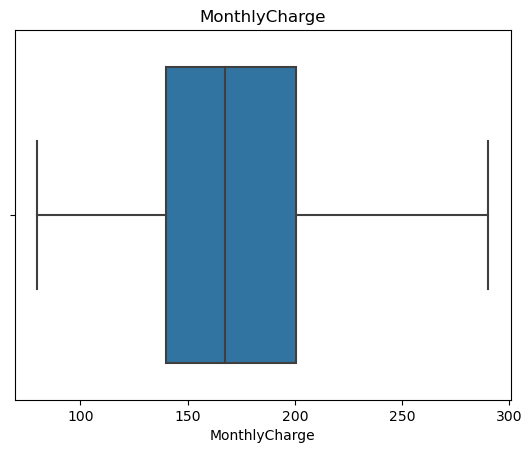

In [27]:
#Generate boxplot for MonthlyCharge variable
email_boxplot = sns.boxplot(x="MonthlyCharge", data = df_churn).set_title("MonthlyCharge")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['MonthlyCharge'])

Now that the data has been cleaned, the last step required is to standardize the data.  This step is necessary because distance based algorithms such as K-means are affected by the scale of variables (Sharma, 2019).  If one variable in the dataset has a larger range of values than another, it may be weighted differently by the algorithm.  This could unfavorably impact the results of the analysis.  

To scale the variables I will use the "StandardScaler()" method from scikit-learn to fit and transform the variables.  This will ensure that all the variables in df_churn have the same magnitude.  The scaled variables will then be assigned to a final dataframe called df_scaled.

In [28]:
#Assign StandardScaler() to scaler variable
scaler = StandardScaler()

#Scale variables and assign to df_scaled
df_scaled = pd.DataFrame(scaler.fit_transform(df_churn), columns = df_churn.columns)

#Print output
df_scaled.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-6.110668e-17,5.542233e-17,-9.556800e-17,5.222489e-17,9.521273e-17,-1.705303e-17,-6.039613e-18,-8.242296e-17,2.273737e-17,-2.529532e-16,9.094947e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-6.760378e-01,-9.723379e-01,-1.694785e+00,-1.399303e+00,-3.327464e+00,-3.640754e+00,-1.005852e+00,-6.258635e-01,-1.267917e+00,-2.157520e+00,-1.481263e+00
25%,-6.249014e-01,-9.723379e-01,-8.734435e-01,-7.299042e-01,-6.665728e-01,-6.662818e-01,-1.005852e+00,-6.258635e-01,-1.006306e+00,-7.602435e-01,-9.865847e-01
50%,-4.743676e-01,-5.065919e-01,-3.787834e-03,-2.353430e-01,5.615783e-03,-5.287951e-03,5.867974e-03,-6.258635e-01,3.420043e-02,-1.197020e-01,-5.162246e-02
75%,2.363805e-01,4.249001e-01,8.658679e-01,4.765941e-01,6.611971e-01,6.557059e-01,1.017588e+00,9.466579e-01,1.019358e+00,6.546178e-01,1.003942e+00
max,7.074113e+00,3.685122e+00,1.735524e+00,7.769694e+00,3.765413e+00,3.630178e+00,6.076186e+00,8.809265e+00,1.417195e+00,2.737145e+00,1.723716e+00


## C4.

I have attached a copy of my cleaned data in a file called "churn_preprocessed.csv".

In [29]:
#Export to csv file
df_scaled.to_csv("churn_preprocessed.csv")

## D1.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To determine the optimal number of clusters, I used the elbow method.  This is a visual method that involves calculating and plotting the within-cluster sum of squares for a range of k values.  The within-cluster sum of squares, or WCSS, is the sum of the squared distance between each data point and the centroid of a cluster (Saji, 2024).  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I began by using a for loop to iterate over different values of k ranging from one through ten.  Within the loop, I initialized the k-means model with k number of centroids, fit the model to the scaled data, and obtained the wcss value using the "inertia_" attribute from sklearn.  The last step I took was to plot the wcss for each k value and visually determine where the "elbow" was located in the graph.  I determined that two was the optimal number of clusters because the slope of the line begins to flatten with larger values of k.

## D2.

Please see the code used below used to perform K-means clustering.

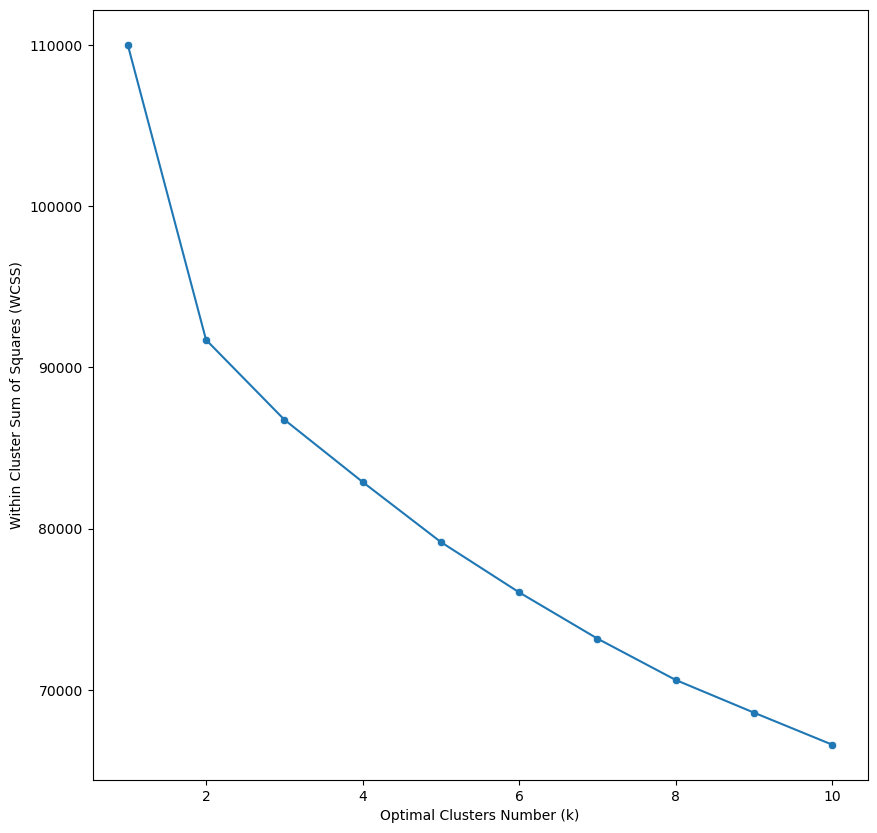

In [30]:
#Calculate Within-Cluster Sum of Squares for K clusters
wcss = [] 
#Use for loop to iterate through k values 1-10
for k in range(1, 11): 
    model = KMeans(n_clusters = k, n_init = 30, random_state = 42)
    model.fit(df_scaled)
    wcss.append(model.inertia_)
#Assign wcss values to pandas series and use k-values as index
wcss_s = pd.Series(wcss, index = range(1,11))

#Plot WCSS calculations and connect points with line
plt.figure(figsize=(10, 10))
ax = sns.lineplot(y = wcss_s, x = wcss_s.index)
ax = sns.scatterplot(y = wcss_s,  x = wcss_s.index)
ax = ax.set(xlabel = 'Optimal Clusters Number (k)',
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

## E1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To determine the quality of the clusters, I plotted the silhouette score for the k values two through ten.  The silhouette score measures how well customers are grouped within their assigned clusters compared to customers in other clusters (Banerji, 2024).  The score can range from -1 to 1, with -1 considered poor clustering and 1 considered good clustering.  Based on the graph below, we can see that a k-value of 2 achieves a silhouette score of 0.17.  This means that the quality of the clusters is above average but they still lack some cohesion.  

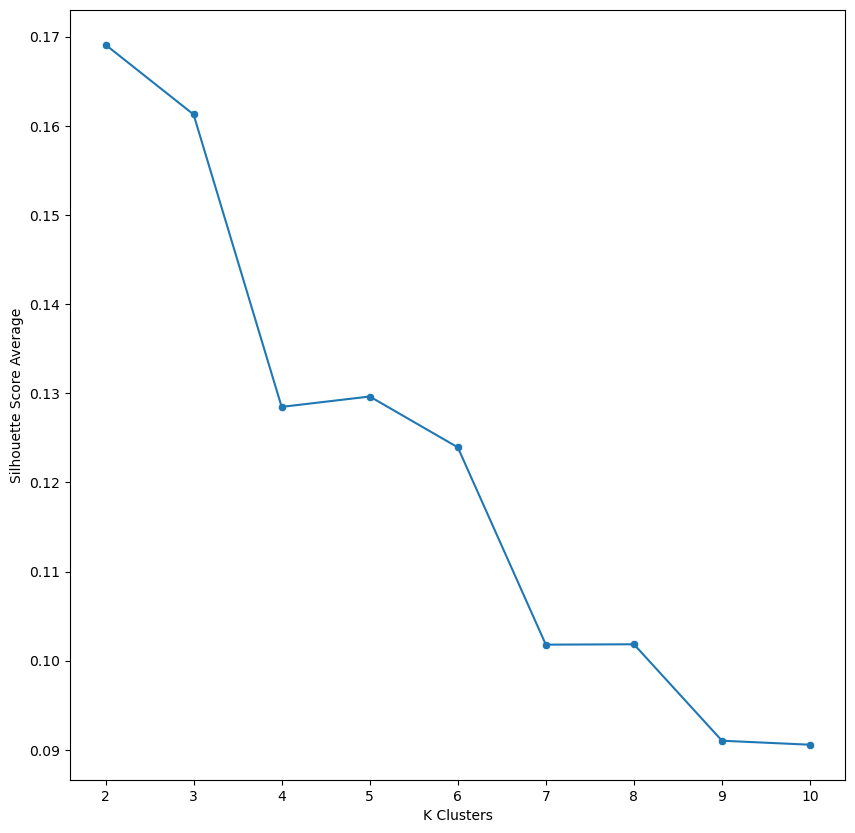

In [31]:
#In-text citation: [Evaluating and visualizing the model_def]

silhouette = []

for k in range (2, 11):
    model = KMeans(n_clusters = k, n_init = 30, random_state = 42)
    model.fit(df_scaled)
    silhouette.append(silhouette_score(df_scaled, model.labels_))

silhouette_s = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize = (10, 10))
ax = sns.lineplot(y = silhouette_s, x = silhouette_s.index)
ax = sns.scatterplot(y = silhouette_s, x = silhouette_s.index)
ax = ax.set(xlabel = "K Clusters", ylabel = "Silhouette Score Average")

## E2.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Based on the results of the elbow method and the silhouette score method, we can see that the optimal number of clusters is indeed two.  However, the silhouette score of 0.17 implies that there is some overlap between them.  This is the case for the other k values that were analyzed.  The K-means model did not not produce poor results by any means, but there is room for improvement.

## E3.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One limitation of the analysis is that K-means is susceptible to influence from outliers.  Centroids can be dragged by outliers, which may reduce the quality of the clusters (Google).  My decision to retain all outliers rather than treat them may have caused the model to achieve suboptimal results.  

## E4.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Based on the results discussed in section E2, there is still some room for improvement in the model.  The company could take a few actions to produce better results in the future.  As mentioned previously, it would be worthwhile to treat outliers in the dataset.  This could influence the centroids used by the model and increase the quality of the clusters.  Additionally, the telecommunications company could try repeating the analysis with fewer variables. As the number of variables increases, the k-means algorithm becomes less effective at clustering (Google).  It's possible the principal component analysis could be used to make the model more reliable.  Overall, these two methods could help produce more meaningful customer segments for the company.

## F.

Please click the link below to access the Panopto recording.

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b8b7df73-876e-4725-9809-b167000beac4

## G. Web Sources

Kamara, K. (Narrator). Evaluating and visualizing the model_def [Online video]. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9fa8783e-d7d2-4b4d-b06e-b0ee01874bea

## H. References

Sharma, P. (2024, May 2). The Ultimate Guide to K-Means Clustering: Definition, Methods and Applications. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

Demonstration of K-Means Assumptions. (2019, December 9). Geeks for Geeks. https://www.geeksforgeeks.org/demonstration-of-k-means-assumptions/

Sharma, P. (2019, August 25). Why is scaling required in KNN and K-Means?. Medium. https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7

Saji, B. (2024, January 7). Elbow Method for Finding the Optimal Number of Clusters in K-Means. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

Banerji, A. (2024, May 4). K-Mean: Getting the Optimal Number of Clusters. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

k-Means Advantages and Disadvantages. (n.d.). Google Machine Learning Education. https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages